<a href="https://colab.research.google.com/github/KevinGomez26/Modelo-de-lenguaje/blob/main/Modelo_de_lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\textbf{Tarea PLN - Modelo de lenguaje basado en bigramas}$

Kevin Alejandro Hernández Gómez 

# *Librerias* 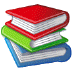

In [ ]:
# para descargar contenido de una url especifica
import urllib.request

# para limpiar los textos
!pip install clean-text
from cleantext import clean

# para tokenizar
import nltk
nltk.download('punkt')

# para las expresiones regulares
import re

#para operaciones matriciales
import numpy

# para generar numeros aleatorios
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=2ffbf2f1562ce9419564fae978575b858709a571d8a57da2e21b56ee0315425d
  Stored in directory: /root/.cache/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#*Descargarmos el corpus de texto para el "entrenamiento"*

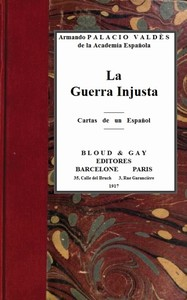

In [ ]:
# la descarga se hace desde la pagina de poryecto Gutenberg (https://www.gutenberg.org/)
url = 'https://www.gutenberg.org/cache/epub/42323/pg42323.txt'

# nombre del archivo
nombre_archivo = 'corpus.txt'

# descarga el archivo
urllib.request.urlretrieve(url, nombre_archivo)

# abrimos el corpus
with open(nombre_archivo, "r") as f:

    # leemos el archivo
    corpus = f.read()
    
# imprimimos el texto
print(corpus)

﻿The Project Gutenberg EBook of La guerra injusta, by Armando Palacio Valdés

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: La guerra injusta

Author: Armando Palacio Valdés

Release Date: March 13, 2013 [EBook #42323]

Language: Spanish


*** START OF THIS PROJECT GUTENBERG EBOOK LA GUERRA INJUSTA ***




Produced by Chuck Greif and the Online Distributed
Proofreading Team at http://www.pgdp.net (This file was
produced from images available at The Internet Archive)








LA GUERRA INJUSTA




Armando PALACIO VALDÈS
de la Academia Española




La
Guerra Injusta

Cartas de un Español

BLOUD & GAY
EDITORES
BARCELONE PARIS
35, Calle del Bruch 3, Rue Garancière
1917
Tous droits réservés




La Decisión de la Francia


La dirección de El Imparcial me ha confiado la honrosa tarea d

#*Divide el corpus en parrafos y limpia el texto* 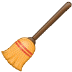

In [ ]:
# separa el corpus por parrafos
parrafos = corpus.split('\n\n')

parrafos_limpio = []

# elimina caracteres
for parrafo in parrafos:

  parrafo = clean(parrafo, 
                    lower=True,                             # para las mayusculas
                    no_digits=True, replace_with_digit='',  # para los nuemeros
                    no_urls=True, replace_with_url='',      # para las urls
                    no_currency_symbols = True,             # para los simbolos poco frecuentes
                    no_punct = True)                        # para los signos de puntuacion

  # elimina simbolos extra
  parrafo = re.sub(r'[=><\n]',' ', parrafo)

  # añade marcas de inicio <s> y final <\s> de parrafo
  parrafo = '<s> '+parrafo+' <\s>'

  # no añade parrafos vacios
  if parrafo != '<s>  <\s>': parrafos_limpio.append(parrafo)

# imprime parrafos limpios
for i in range(len(parrafos_limpio)):

  print(parrafos_limpio[i]+'\n')

<s> the project gutenberg ebook of la guerra injusta by armando palacio valdes <\s>

<s> this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever you may copy it give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at <\s>

<s> title la guerra injusta <\s>

<s> author armando palacio valdes <\s>

<s> release date march ebook <\s>

<s> language spanish <\s>

<s> start of this project gutenberg ebook la guerra injusta <\s>

<s> produced by chuck greif and the online distributed proofreading team at this file was produced from images available at the internet archive <\s>

<s> la guerra injusta <\s>

<s> armando palacio valdes de la academia espanola <\s>

<s> la guerra injusta <\s>

<s> cartas de un espanol <\s>

<s> bloud gay editores barcelone paris calle del bruch rue garanciere tous droits reserves <\s>

<s> la decision de la francia <\s>

<s> la direccion de el imparcial me ha confiado 

#*Tokenizacion a nivel de palabras* 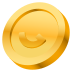

In [ ]:
# crea tokens
lista_tokens = []

# cada parrafo dentro del corpus es tokenizado
for parrafo in parrafos_limpio:
  
  lista_tokens.append(parrafo.split(' '))

# imprime tokens
for i in range(len(lista_tokens)):

  print(lista_tokens[i])
  print('\n')

['<s>', 'the', 'project', 'gutenberg', 'ebook', 'of', 'la', 'guerra', 'injusta', 'by', 'armando', 'palacio', 'valdes', '<\\s>']


['<s>', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'reuse', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', '<\\s>']


['<s>', 'title', 'la', 'guerra', 'injusta', '<\\s>']


['<s>', 'author', 'armando', 'palacio', 'valdes', '<\\s>']


['<s>', 'release', 'date', 'march', 'ebook', '<\\s>']


['<s>', 'language', 'spanish', '<\\s>']


['<s>', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'la', 'guerra', 'injusta', '<\\s>']


['<s>', 'produced', 'by', 'chuck', 'greif', 'and', 'the', 'online', 'distributed', 'proofreading', 'team', 'at', 'this', 'file', 'was', 'produced', 'from', 'images', 'available', 

# *Se obtienen los uni-gramas y bi-gramas* 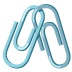

In [ ]:
# genera los uni-gramas 
lista_unigramas = []

for parrafo in lista_tokens:

  for token in parrafo: lista_unigramas.append(token)

# genera bi-gramas 
lista_bigramas = []

for parrafo in lista_tokens:

  bigramas = list(nltk.bigrams(parrafo)) 

  # añade cada bigrama de cada uno de los parrafos
  for bigrama in bigramas:

    lista_bigramas.append(bigrama)

# imprime los bi-gramas
for i in range(len(lista_bigramas)):

  print(lista_bigramas[i])

Se han truncado las últimas 5000 líneas del flujo de salida.
('nuestro', 'huesped')
('huesped', 'reciente')
('reciente', 'enrique')
('enrique', 'bergson')
('bergson', 'el')
('el', 'hombre')
('hombre', 'cabalga')
('cabalga', 'sobre')
('sobre', 'la')
('la', 'animalidad')
('animalidad', 'y')
('y', 'la')
('la', 'humanidad')
('humanidad', 'entera')
('entera', 'en')
('en', 'el')
('el', 'espacio')
('espacio', 'y')
('y', 'el')
('el', 'tiempo')
('tiempo', 'es')
('es', 'un')
('un', 'inmenso')
('inmenso', 'ejercito')
('ejercito', 'que')
('que', 'galopa')
('galopa', 'al')
('al', 'lado')
('lado', 'de')
('de', 'cada')
('cada', 'uno')
('uno', 'de')
('de', 'nosotros')
('nosotros', 'delante')
('delante', 'y')
('y', 'detras')
('detras', 'de')
('de', 'nosotros')
('nosotros', 'en')
('en', 'una')
('una', 'carga')
('carga', 'arrebatada')
('arrebatada', 'capaz')
('capaz', 'de')
('de', 'derribar')
('derribar', 'todas')
('todas', 'las')
('las', 'resistencias')
('resistencias', 'y')
('y', 'de')
('de', 'franquea

#*Calcula la probabilidad de aparicion asociada a cada bi-grama* 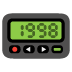

#$P(w_{i}\mid w_{i-1}) = \frac{C(w_{i-1}, w_{i})}{C(w_{i-1})}$

In [ ]:
# recuento de uni-gramas
recuento_unigrama = dict()

for token in set(lista_unigramas):

  recuento_unigrama[token] = lista_unigramas.count(token)

# recuento de bi-gramas
recuento_bigrama = dict()

for bigrama in set(lista_bigramas):

  recuento_bigrama[bigrama] = lista_bigramas.count(bigrama)

# calcula la probabilidad para cada bi-grama
probabilidad_bigrama = dict()

for bigrama in recuento_bigrama.keys(): 
  
  probabilidad_bigrama[bigrama] = recuento_bigrama[bigrama]/recuento_unigrama[bigrama[0]]

# imprime la probabilidad de los bi-gramas
print(probabilidad_bigrama)

{('arrojo', 'sobre'): 1.0, ('ella', 'cuando'): 0.041666666666666664, ('plena', 'borrachera'): 1.0, ('and', 'distribution'): 0.028169014084507043, ('nuevo', 'napoleon'): 0.07142857142857142, ('venerables', 'propias'): 1.0, ('alli', 'mismo'): 0.05555555555555555, ('estas', 'voces'): 0.05263157894736842, ('your', 'use'): 0.1111111111111111, ('depravaciones', 'que'): 1.0, ('fee', 'is'): 0.125, ('una', 'bala'): 0.008620689655172414, ('un', 'tonto'): 0.005479452054794521, ('vertidolas', 'lagrimas'): 1.0, ('respiracion', 'de'): 0.5, ('puede', 'imaginar'): 0.05, ('sus', 'conocidos'): 0.006578947368421052, ('centros', 'cerebrales'): 1.0, ('hijo', 'le'): 0.1, ('al', 'fin'): 0.034013605442176874, ('', 'jardin'): 0.002688172043010753, ('le', 'dicen'): 0.010526315789473684, ('fallecido', 'recientemente'): 1.0, ('ello', 'toda'): 0.16666666666666666, ('intrepidos', 'generosos'): 1.0, ('', 'vivia'): 0.002688172043010753, ('pude', 'haberme'): 0.3333333333333333, ('en', 'uno'): 0.003865979381443299, ('i

#*Generando texto* 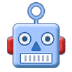

In [ ]:
# busca de forma aleatoria una palabra para inicializar el texto 
#(dento del conjunto de las mas probables)
lista_token_inicial = []

probabilidad_token = []

for indice, bigrama in enumerate(set(lista_bigramas)):

  if bigrama[0] == '<s>':

    # palabras
    lista_token_inicial.append(bigrama[1]) 

    # probabilidad del bigrama al que pertenece el token
    probabilidad_token.append(list(probabilidad_bigrama.values())[indice])

# numero de palabras a conciderar
numero_tokens = 20

# reodena de mayor a menor probabilidad y se escoge entre las primeras 20
indice_probabilidad = numpy.argsort(numpy.array(probabilidad_token))[::-1][:numero_tokens]

# se selecciona una token aleatorio para empezar la frase
token_inicial = lista_token_inicial[random.choice(indice_probabilidad)]

# imprime la palabra
print(token_inicial)

las


In [ ]:
# maxima longitud de tokens a generar
longitud_tokens_generados = 20

# token inicial
token = token_inicial

# texto generado
texto = token_inicial

while len(texto.split(' ')) != longitud_tokens_generados:

  lista_token_siguiente = []

  lista_probabilidad_token_siguiente = []

  # busca los posibles siguientes tokens a partir del token anterior
  for indice, bigrama in enumerate(set(lista_bigramas)):

    if bigrama[0] == token: 
      
      # lista de siguientes tokens
      lista_token_siguiente.append(bigrama[1])

      # lista probabilidad siguientes tokens
      lista_probabilidad_token_siguiente.append(list(probabilidad_bigrama.values())[indice])

  # reodena de mayor a menor probabilidad y se escoge entre las primeras 20
  indice_probabilidad_siguiente = numpy.argsort(numpy.array(lista_probabilidad_token_siguiente))[::-1][:numero_tokens]

  # selecciona aleatoriamente el siguiente token
  token = lista_token_siguiente[random.choice(indice_probabilidad_siguiente)]

  # concatena el token
  texto += ' ' + token 

# imprime texto
print(texto)

las armas al fin que han tenido una palabra de los demas prosiguen impasibles su marido todos modos yo tambien
